<a href="https://colab.research.google.com/github/rohit-kapoor/Machine-learning/blob/master/working_on_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(len(x_train))
print(len(x_test))

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
60000
10000


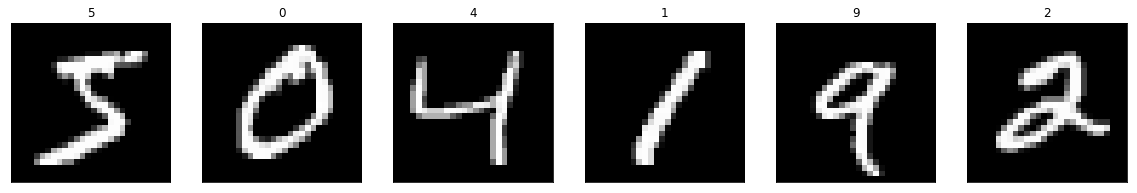

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
fig=plt.figure(figsize=(20,20))
for i in range(6):
    ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i],cmap='gray')
    ax.set_title(str(y_train[i]))

#### now we will try to print one of the image in more detail

ValueError: ignored

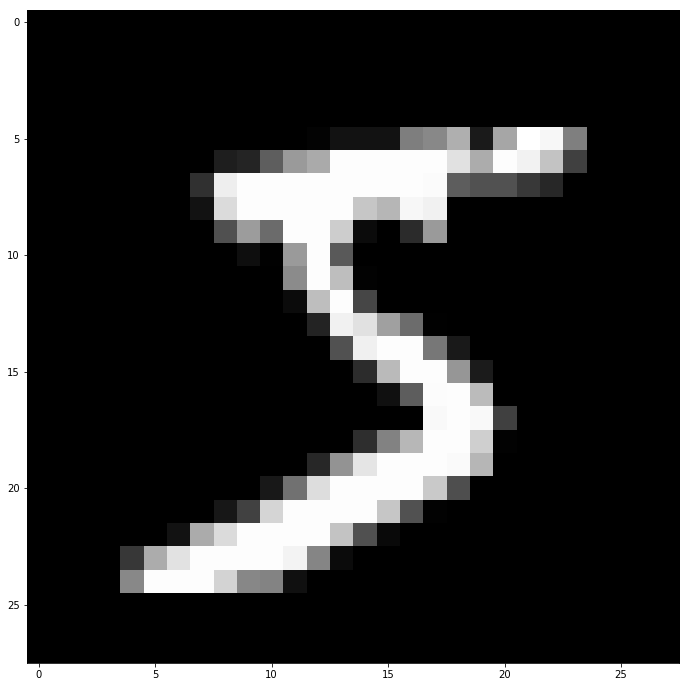

In [4]:
def vizualize_input(img,ax):
    ax.imshow(img,cmap='gray')
    width,height=img.shape
    thresh=img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)),xy=(y,x),
            horizontalalignment='centre',
            verticalalignment='centre',
            color='white' if img[x][y]<thresh else 'black')
    
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(1,1,1)
vizualize_input(x_train[0],ax)

#### now we will rescle the image by dividing every pixel in every image by 255

In [0]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

#### encode categorical integer labels using a one-hot-scheme

In [6]:
from keras.utils import np_utils
# print first ten (integer-valued ) training labels
print('Integer-valued labels:')
print(y_train[:10])
# one hot encode the labels
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
print('one-hot-labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
one-hot-labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#### define the model architecture

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

# define the model
model =Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

W0615 12:49:33.483589 140413135624064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 12:49:33.518662 140413135624064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 12:49:33.538716 140413135624064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 12:49:33.555497 140413135624064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0615 12:49:33.566007 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


W0615 12:49:41.268854 140413135624064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0615 12:49:41.299893 140413135624064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### calculate the accuracy on set before training

In [9]:
score=model.evaluate(x_test,y_test,verbose=0)
accuracy=100*score[1]
print("the accuracy is",accuracy)

the accuracy is 11.06


## now we will train the model

In [12]:
from keras.callbacks import ModelCheckpoint

checkpointer=ModelCheckpoint(filepath='mnist.model.best.hdf5',
                             verbose=1,save_best_only=True)
hist=model.fit(x_train,y_train,batch_size=128,epochs=100,
              validation_split=0.2,callbacks=[checkpointer],
              verbose=1,shuffle=True)


Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 34us/step - loss: 0.0264 - acc: 0.9925 - val_loss: 0.1046 - val_acc: 0.9811

Epoch 00001: val_loss improved from inf to 0.10465, saving model to mnist.model.best.hdf5
Epoch 2/100
48000/48000 [==============================] - 2s 34us/step - loss: 0.0226 - acc: 0.9932 - val_loss: 0.1116 - val_acc: 0.9816

Epoch 00002: val_loss did not improve from 0.10465
Epoch 3/100
48000/48000 [==============================] - 2s 33us/step - loss: 0.0223 - acc: 0.9931 - val_loss: 0.1207 - val_acc: 0.9787

Epoch 00003: val_loss did not improve from 0.10465
Epoch 4/100
48000/48000 [==============================] - 2s 34us/step - loss: 0.0209 - acc: 0.9941 - val_loss: 0.1183 - val_acc: 0.9814

Epoch 00004: val_loss did not improve from 0.10465
Epoch 5/100
48000/48000 [==============================] - 2s 34us/step - loss: 0.0191 - acc: 0.9948 - val_loss: 0.1213 - val_acc: 0.9803

Epoch 00005:

## load the model with the best classification accuracy on the set

In [0]:
# load the models which yielded the best validaion accuracy on the set
model.load_weights('mnist.model.best.hdf5')

## calculate the classification accuracy on the test set

In [14]:
score=model.evaluate(x_test,y_test,verbose=0)
print(score)
accuracy=100*score[1]
print(accuracy)

[0.08809179703994396, 0.9829]
98.29
